In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import shortest_path
import math
import descartes
from shapely.geometry import Point,Polygon

# AgeDep
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec
from scipy import optimize
from scipy.optimize import curve_fit
from scipy import stats
SMALL_SIZE = 20
MEDIUM_SIZE = 22
BIGGER_SIZE = 22
plt.rc('text', usetex=True)
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] =['DejaVu Sans'] #Font type

Source of data on critical care survivability:https://www.icnarc.org/DataServices/Attachments/Download/76a7364b-4b76-ea11-9124-00505601089b
Page 14 table 5. 

Note the disclaimer of:
Owing to the emerging nature of the epidemic, the sample of patients with COVID-19 represented in this
table is biased towards patients with shorter durations of critical care

(For italian data look below the following figure)

In [2]:
ccEngDeaths=np.array([0.236,0.458,0.681])
CCEngAge=np.array([40,60,80])

[1.01458027e-03 1.48683405e+00]
[0.24450275 0.44678876 0.68527581]


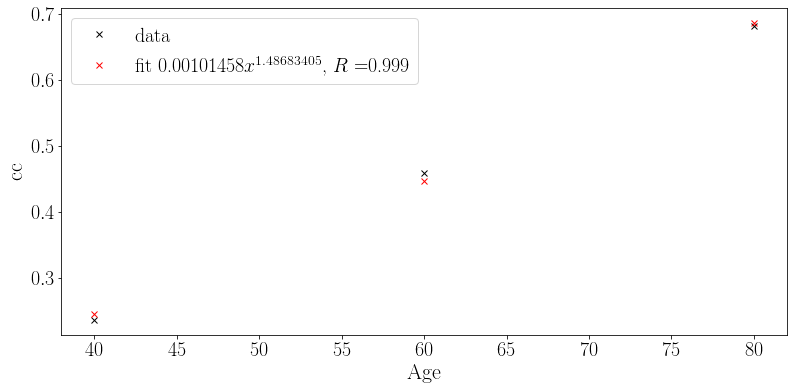

In [3]:
plt.figure(figsize=(13,6))#size of figure in inches

plt.xlabel(r'Age')
plt.ylabel('cc')
r_value=0
def func(a,b,x):
    return a*np.power(x,b)
fitfunc = lambda p, x: p[0]*np.power(x,p[1])
errfunc = lambda p, x, y: fitfunc(p, x) - y
 # Initial guess for the parameters
p0 = [0.002, 0.01]
p1,success = optimize.leastsq(errfunc, p0[:], args=(CCEngAge, ccEngDeaths))

slope, intercept, r_value, p_value, std_err = stats.linregress(func(p1[0],p1[1],CCEngAge),ccEngDeaths)
plt.plot((CCEngAge),(ccEngDeaths), 'kx',label='data')
print(p1)
plt.plot( CCEngAge, fitfunc(p1, CCEngAge), "rx",label='fit  '+'{:01.8f}'.format(p1[0])+r'$x^{1.48683405}$, '+ '$R=$'+'{:01.3f}'.format(r_value) )
plt.legend()
plt.savefig("CCENg.jpg")
print(fitfunc(p1, CCEngAge))


Next we look at the case fatality ratio of the italian data

In [4]:
AgeDep = pd.read_csv('AgeDeathDep.csv')
Age=AgeDep['Age'].values
#(we cut it in half since one would think they did not catch all the cases so this is even so maybe an overestimation, if you disagree get rid of this)
Fatality=AgeDep['Fatality'].values/2 

[1.87554676e-08 3.54963984e+00]
[30 40 50 60 70 80 90]


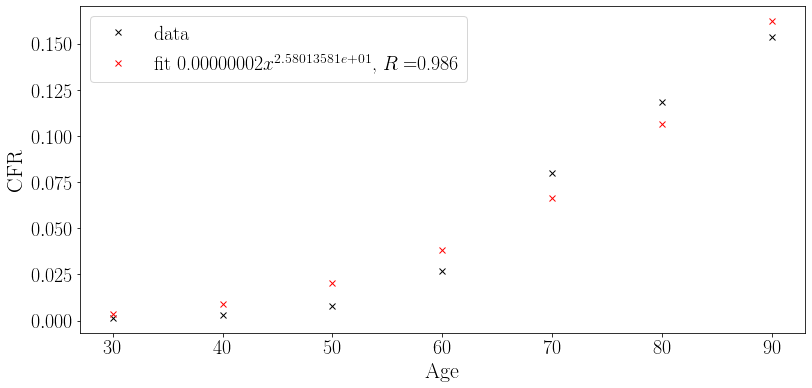

In [5]:
plt.figure(figsize=(13,6))#size of figure in inches

plt.xlabel(r'Age')
plt.ylabel('CFR')
r_value=0
def func(a,b,x):
    return a*np.power(x,b)
fitfunc = lambda p, x: p[0]*np.power(x,p[1])
errfunc = lambda p, x, y: fitfunc(p, x) - y
 # Initial guess for the parameters
p0 = [0.002, 0.01]
p1,success = optimize.leastsq(errfunc, p0[:], args=(Age, Fatality/100))

slope, intercept, r_value, p_value, std_err = stats.linregress(func(p1[0],p1[1],Age),Fatality/100)
plt.plot((Age),(Fatality)/100, 'kx',label='data')
print(p1)
plt.plot( Age, fitfunc(p1, Age), "rx",label='fit  '+'{:01.8f}'.format(p1[0])+r'$x^{2.58013581e+01}$, '+ '$R=$'+'{:01.3f}'.format(r_value) )
plt.legend()
plt.savefig("CFR.jpg")
print(Age)

The next couple of plots look at the age depedence of hh (fraction symptomatic people that are hospitalised), cc(fraction of hospitalised people that will require critical care) and mm (fraction of people that die from critcal care)

In [6]:
work_age_groups = ['0-15', '16-24', '25-34', '35-49', '50-64', '65-74', '75+']
age=[7.5,20,30,42.5,57,70,80]

Crudely using https://www.medrxiv.org/content/10.1101/2020.04.08.20056861v1.full.pdf

In [7]:
A=np.array([52, 70, 117, 261, 351, 130, 98])
P=np.array([68, 90, 200, 510, 636, 275, 390 ])
S=np.array([90, 160, 370,1300,2200, 1600,2000 ])
H=np.array([12, 25, 95,420,1300, 900,1200 ])
C=np.array([0.1,3,13,78, 280, 250, 211])
Im=np.array([0.01,0.13,6,52,500,1300,3700 ]) #We can't have zeroes in here so we put very small numbers in
Im=Im/5541*300

In [8]:
alpha=(A+P)/(S+H+C+A+P)
alpha
#We are assuming asymptomatic and paucisymptomatic people are asymptomatic in our model

array([0.54029716, 0.45977011, 0.39874214, 0.30011678, 0.20704846,
       0.12836767, 0.1251603 ])

[  0.6591976  -50.47700294]


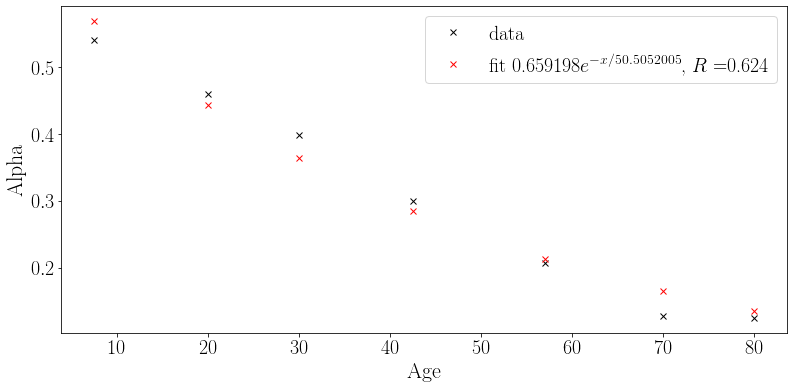

In [9]:

plt.figure(figsize=(13,6))#size of figure in inches

# plt.loglog((dens),(betaNp), 'kx')
plt.xlabel(r'Age')
plt.ylabel('Alpha')
r_value=0
def func(a,b,x):
    return a*np.power(x,b)
fitfunc = lambda p, x: p[0]*np.power(np.exp(1),x/p[1])
errfunc = lambda p, x, y: fitfunc(p, x) - y

p0 = [0.002, -3]
p1,success = optimize.leastsq(errfunc, p0[:], args=(age, alpha))

slope, intercept, r_value, p_value, std_err = stats.linregress(func(p1[0],p1[1],age),alpha)
plt.plot((age),(alpha), 'kx',label='data')
print(p1)
plt.plot( age, fitfunc(p1, age), "rx",label='fit  '+'{:01.6f}'.format(p1[0])+r'$e^{-x/50.5052005}$, '+ '$R=$'+'{:01.3f}'.format(r_value) )
plt.legend()
plt.savefig("Alpha.jpg")
# print(fitfunc(p1, age))

In [10]:
hh=(H)/S
hh=hh/1.5 # we try to fit the mean of the Uk that suggest 1/7 of cases require hospitalisation more closely
#we are assuming here that a severe corona virus case in Italy requires hospitalisation which isn't neccesarily true

[0.01022282 0.85039945]


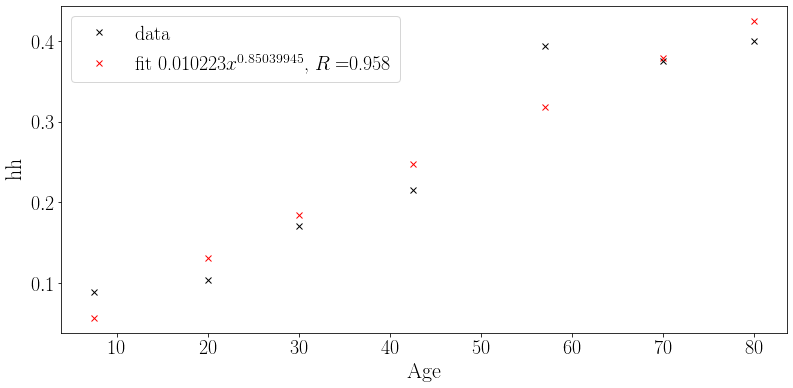

In [11]:
plt.figure(figsize=(13,6))#size of figure in inches

plt.xlabel(r'Age')
plt.ylabel('hh')
r_value=0
def func(a,b,x):
    return a*np.power(x,b)
fitfunc = lambda p, x: p[0]*np.power(x,p[1])
errfunc = lambda p, x, y: fitfunc(p, x) - y
# funvec=np.vectorize(fitfunc)

p0 = [0.002, 0.01]
p1,success = optimize.leastsq(errfunc, p0[:], args=(age, hh))

slope, intercept, r_value, p_value, std_err = stats.linregress(func(p1[0],p1[1],age),hh)
plt.plot((age),(hh), 'kx',label='data')
print(p1)
plt.plot( age, fitfunc(p1, age), "rx",label='fit  '+'{:01.6f}'.format(p1[0])+r'$x^{0.85039945}$, '+ '$R=$'+'{:01.3f}'.format(r_value) )
plt.legend()
plt.savefig("hh.jpg")
# print(fitfunc(p1, age))

I rescale cc to be closer to have the mean closer to the non age distributed lit value 

In [12]:
cc=(C+Im)/H
cc=cc*1.5
#Again this number is more orientational than anything, we are assuming critical cases require ICU (and that the dead required ICU)

[0.00785079 0.96629253]


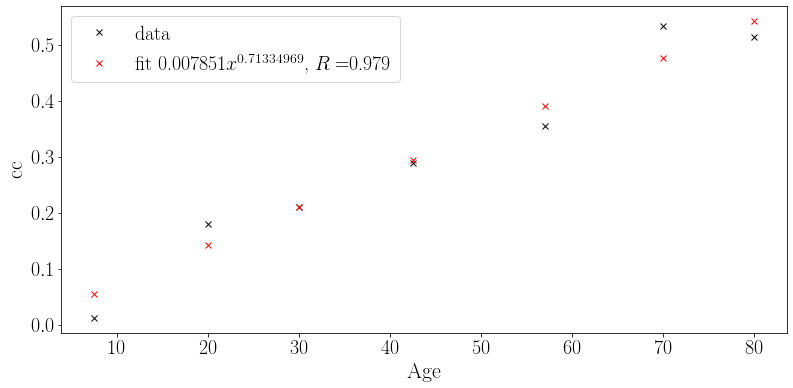

In [13]:
plt.figure(figsize=(13,6))#size of figure in inches

# plt.loglog((dens),(betaNp), 'kx')
plt.xlabel(r'Age')
plt.ylabel('cc')
r_value=0
def func(a,b,x):
    return a*np.power(x,b)
fitfunc = lambda p, x: p[0]*np.power(x,p[1])
errfunc = lambda p, x, y: fitfunc(p, x) - y
 # Initial guess for the parameters
p0 = [0.002, 0.01]
p1,success = optimize.leastsq(errfunc, p0[:], args=(age, cc))

slope, intercept, r_value, p_value, std_err = stats.linregress(func(p1[0],p1[1],age),cc)
plt.plot((age),(cc), 'kx',label='data')
print(p1)
plt.plot( age, fitfunc(p1, age), "rx",label='fit  '+'{:01.6f}'.format(p1[0])+r'$x^{0.71334969}$, '+ '$R=$'+'{:01.3f}'.format(r_value) )
plt.legend()
plt.savefig("cc.jpg")
# print(fitfunc(p1, age))

In [14]:
mm=Im/C
mm
#We assume that the critical cases were in ICU 
#We also perform a rescaling on the death dataset to have the same number of cases as the much smaller severtiy dataset

array([0.00541419, 0.00234615, 0.02498855, 0.03609457, 0.09668188,
       0.28153763, 0.94940688])

[5.94616064e-17 8.51311252e+00]


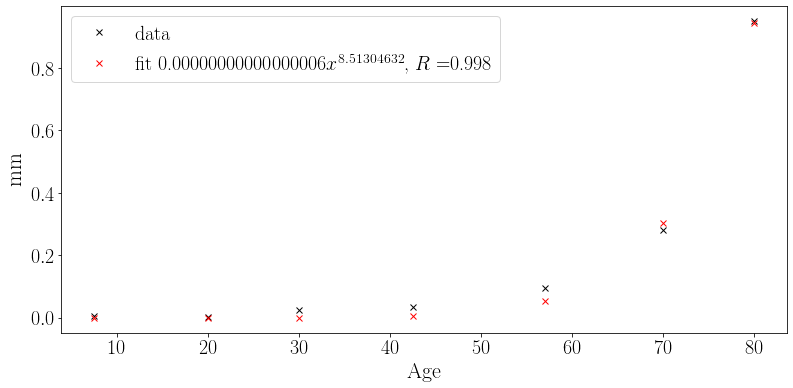

In [15]:

plt.rc('text', usetex=True)
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] =['DejaVu Sans'] #Font type
plt.figure(figsize=(13,6))#size of figure in inches

plt.xlabel(r'Age')
plt.ylabel('mm')
r_value=0
def func(a,b,x):
    return a*np.power(x,b)
fitfunc = lambda p, x: p[0]*np.power(x,p[1])
errfunc = lambda p, x, y: fitfunc(p, x) - y
 # Initial guess for the parameters
p0 = [0.002, 0.01]
p1,success = optimize.leastsq(errfunc, p0[:], args=(age, mm))

slope, intercept, r_value, p_value, std_err = stats.linregress(func(p1[0],p1[1],age),mm)
plt.plot((age),(mm), 'kx',label='data')
print(p1)
plt.plot( age, fitfunc(p1, age), "rx",label='fit  '+'{:01.17f}'.format(p1[0])+r'$x^{8.51304632}$, '+ '$R=$'+'{:01.3f}'.format(r_value) )
plt.legend()
plt.savefig("mm.jpg")